#### Lesson Objective:
* learn how to read a video in Python
* learn how to separate background from moving objects using Non-negative Matrix Factorization

In [1]:
# import common modules
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

#### Reading Video

In [2]:
# set the path
video_path = os.path.join('data','MAH08632.MP4')

Unfortunately, Anaconda installation does not provide a package which reads `.mp4` directly. (`scikit-image` can read `.tiff` sequences). A useful package to do that is `imageio` which can be installed separately:
    
```
conda install -c menpo imageio=1.5.0
```

In [3]:
# import and test the presence of 'ffmpeg'
import imageio
imageio.plugins.ffmpeg.download()

AttributeError: 'module' object has no attribute 'download'

In [4]:
# get a pointer to the video
vid = imageio.get_reader(video_path,'ffmpeg')

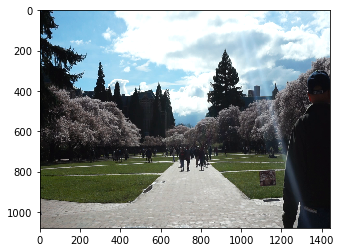

In [5]:
# extract and display the first frame
image = vid.get_data(0)
plt.imshow(image)
m = image.shape[0]
n = image.shape[1]
nofFrames = len(vid)

We will not read the whole video as it will overfill the RAM. We will subsample by 50. We will also read just the first channel, and stack all the pixels in an vector.

In [7]:
# sequence of frames to read
nums = np.linspace(0,nofFrames-1,5)

# read the video frameas and store in a list
video = []
for num in nums:
    video.append(vid.get_data(num)[:,:,0].ravel())

RuntimeError: Could not read frame:

=== stderr ===
ffmpeg version 2.7 Copyright (c) 2000-2015 the FFmpeg developers
  built with gcc 4.9.2 (GCC)
  configuration: --enable-gpl --enable-version3 --disable-w32threads --enable-avisynth --enable-bzlib --enable-fontconfig --enable-frei0r --enable-gnutls --enable-iconv --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libdcadec --enable-libfreetype --enable-libgme --enable-libgsm --enable-libilbc --enable-libmodplug --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-librtmp --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvo-aacenc --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-lzma --enable-decklink --enable-zlib
  libavutil      54. 27.100 / 54. 27.100
  libavcodec     56. 41.100 / 56. 41.100
  libavformat    56. 36.100 / 56. 36.100
  libavdevice    56.  4.100 / 56.  4.100
  libavfilter     5. 16.101 /  5. 16.101
  libswscale      3.  1.101 /  3.  1.101
  libswresample   1.  2.100 /  1.  2.100
  libpostproc    53.  3.100 / 53.  3.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'C:\Users\saisi\Documents\GitHub\Novice2DataNinja\data\MAH08632.MP4':
  Metadata:
    major_brand     : MSNV
    minor_version   : 22675568
    compatible_brands: MSNVmp42isom

    creation_time   : 2017-04-06 21:34:42
  Duration: 00:03:23.20, start: 0.000000, bitrate: 12117 kb/s
    Stream #0:0(und): Video: h264 (Main) (avc1 / 0x31637661), yuv420p(tv, bt709/bt709/iec61966-2-4), 1440x1080 [SAR 4:3 DAR 16:9], 11986 kb/s, 29.97 fps, 29.97 tbr, 30k tbn, 59.94 tbc (default)
    Metadata:
      creation_time   : 2017-04-06 21:34:42
      handler_name    : Video Media Handler
      encoder         : AVC Coding
    Stream #0:1(und): Audio: aac (LC) (mp4a / 0x6134706D), 48000 Hz, stereo, fltp, 127 kb/s (default)
    Metadata:

      creation_time   : 2017-04-06 21:34:42
      handler_name    : Sound Media Handler
Output #0, image2pipe, to 'pipe:':
  Metadata:
    major_brand     : MSNV
    minor_version   : 22675568
    compatible_brands: MSNVmp42isom
    encoder         : Lavf56.36.100
    Stream #0:0(und): Video: rawvideo (RGB[24] / 0x18424752), rgb24, 1440x1080 [SAR 4:3 DAR 16:9], q=2-31, 200 kb/s, 29.97 fps, 29.97 tbn, 29.97 tbc (default)
    Metadata:
      creation_time   : 2017-04-06 21:34:42
      handler_name    : Video Media Handler
      encoder         : Lavc56.41.100 rawvideo
Stream mapping:
  Stream #0:0 -> #0:0 (h264 (native) -> rawvideo (native))
Press [q] to stop, [?] for help
frame=    0 fps=0.0 q=0.0 Lsize=       0kB time=00:00:00.00 bitrate=N/A    
video:0kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
Output file is empty, nothing was encoded (check -ss / -t / -frames parameters if used)

In [ ]:
# convert the list to array
data = np.array(video)

In [ ]:
data.shape

#### Background Separation via NMF

In [ ]:
# we hope that the background will correspond to the first component
n_components = 1


# perform NMF
from sklearn.decomposition import NMF
model = NMF(init="nndsvd", n_components=n_components, random_state=1)
W_matrix = model.fit_transform(data)
H_matrix = model.components_

In [ ]:
plt.figure(figsize = (7,7))
plt.imshow(H_matrix.reshape(m,n,n_components)[:,:,0],cmap = 'gray')
plt.axis('off')

#### Tips for working with large videos:
* consider memory mapping the video to a file on disk when the video cannot fit in RAM 
* store them as `.hdf5` to allow quick individual access to frames
* use out-of-core libraries such as `dask.array` to do operations on individual chunks and combine the results